## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

## Checking Number of Usable Handover Events in each Dataset for varying Window Sizes

In [3]:
icnp_paths = os.listdir("icnp-dataset")
misc_paths = os.listdir("with_RAW")

icnp_paths = ["icnp-dataset/" + f for f in icnp_paths]
misc_paths = ["with_RAW/" + f for f in misc_paths]

In [4]:
# Checks if the HO event is usable for the input window_size
def ho_event_usable(folder_path, window_size):
    files = os.listdir(folder_path)
    files = [folder_path + "/" + f for f in files]
    
    for f in files:
        df = pd.read_csv(f)
        # getting the number of rows
        nrows = len(df.axes[0]) 
        if nrows > window_size:
            return True

    # Return false if the HO event does not have anything useful
    return False


# Function to iterate through each master folder and count all the handover events, along with the usable number of HO events
def count_usable(folder_path, window_size):
    usable_ho_count = 0

    ho_paths = os.listdir(folder_path)
    ho_paths = [folder_path + '/' + f for f in ho_paths]
    for ho_path in ho_paths:
        if ho_event_usable(ho_path, window_size):
            usable_ho_count += 1
    
    print("For Current folder:", folder_path)
    print("Total handover events:", len(ho_paths))
    print("Usable handover events:", usable_ho_count)

In [5]:
for f in icnp_paths:
    count_usable(f, 5)
    print("\n")

for f in misc_paths:
    count_usable(f, 5)
    print("\n")

For Current folder: icnp-dataset/TMobile
Total handover events: 1814
Usable handover events: 1808


For Current folder: icnp-dataset/ATT
Total handover events: 2133
Usable handover events: 2102


For Current folder: with_RAW/Sprint_Dataset
Total handover events: 98
Usable handover events: 97


For Current folder: with_RAW/HSR_July_Dataset
Total handover events: 295
Usable handover events: 223


For Current folder: with_RAW/ATT_Dataset
Total handover events: 2461
Usable handover events: 2340


For Current folder: with_RAW/Verizon_Dataset
Total handover events: 39
Usable handover events: 39


For Current folder: with_RAW/HSR_August_Dataset
Total handover events: 399
Usable handover events: 242




## Variation of F1-scores with Window Size

### Evaluating using the change in performance of the raw binary classifier as the window size changes

In [57]:
# Results obtained from a separate file
WS3 = [0.7145969498910677, 0.7439999999999999, 0.728744939271255, 0.7238493723849372, 0.7359667359667359, 0.7341772151898733, 0.7490636704119851, 0.7475149105367792, 0.7276595744680852, 0.7442827442827443]
WS4 =  [0.7684021543985636, 0.7656903765690376, 0.7631027253668763, 0.725, 0.7743190661478598, 0.7672955974842768, 0.7586206896551726, 0.7536842105263158, 0.7586206896551724, 0.7741935483870968]
WS5 = [0.7904000000000001, 0.7374749498997994, 0.7066381156316918, 0.7317073170731708, 0.7941712204007285, 0.7813084112149533, 0.7226890756302521, 0.70995670995671, 0.767175572519084, 0.748987854251012]
WS6 = [0.7240704500978474, 0.7300970873786408, 0.7372549019607842, 0.7168316831683168, 0.7431906614785991, 0.7033898305084746, 0.7386363636363636, 0.7724137931034483, 0.732943469785575, 0.7447216890595009]
WS7 = [0.7615062761506276, 0.7593360995850622, 0.7587628865979381, 0.7505330490405118, 0.7526427061310782, 0.7040358744394618, 0.7795275590551181, 0.7830342577487766, 0.7689161554192228, 0.7890625000000001]
WS8 =  [0.7816901408450705, 0.7336244541484715, 0.7840909090909092, 0.7847082494969818, 0.7175925925925927, 0.7212389380530975, 0.7785714285714286, 0.739606126914661, 0.7300884955752212, 0.7881944444444444]
WS9 =  [0.738255033557047, 0.7423935091277891, 0.7524366471734893, 0.744466800804829, 0.7276507276507276, 0.7009345794392523, 0.7194570135746606, 0.7578558225508317, 0.7261146496815286, 0.7394957983193278]
WS10 = [0.7381443298969071, 0.7436974789915966, 0.7675675675675675, 0.7272727272727273, 0.7719869706840391, 0.7468879668049793, 0.7540983606557377, 0.7564575645756458, 0.7470355731225298, 0.7002188183807441]
WS11 = [0.7746741154562383, 0.7429718875502008, 0.7254098360655736, 0.735966735966736, 0.7761194029850745, 0.7261410788381742, 0.7656250000000001, 0.7423935091277891, 0.7896678966789666, 0.7796610169491526]
WS12 = [0.7673469387755102, 0.7393162393162392, 0.7755102040816326, 0.7205240174672489, 0.7102803738317758, 0.712018140589569, 0.7607361963190185, 0.7665369649805447, 0.7462039045553145, 0.7544910179640718]


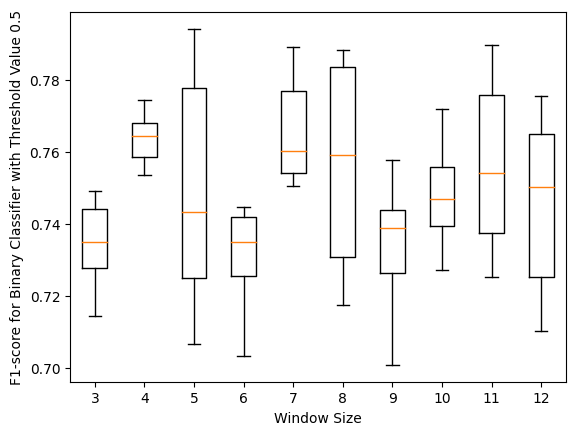

In [52]:
to_plot = [WS3, WS4, WS5, WS6, WS7, WS8, WS9, WS10, WS11, WS12]

# Removing Outliers
# to_plot = remove_outliers(to_plot)
plt.boxplot(to_plot, showfliers=False)
plt.xticks(np.arange(1,len(to_plot)+1), np.arange(3, len(to_plot)+3))
plt.xlabel("Window Size")
plt.ylabel("F1-score for Binary Classifier with Threshold Value 0.5")
plt.show()

In [49]:
nt_WS3 =[0.7327433628318584, 0.6793048973143759, 0.6728971962616821, 0.7054908485856906, 0.737030411449016, 0.7308377896613191, 0.6205923836389281, 0.6197183098591549, 0.7347670250896057, 0.6205923836389281]
nt_WS4 = [0.6493860845839018, 0.767605633802817, 0.7615658362989324, 0.6485013623978201, 0.7193798449612403, 0.7640845070422536, 0.7438825448613378, 0.6449864498644986, 0.6449864498644986, 0.7585034013605442]
nt_WS5 = [0.6868421052631579, 0.7943485086342228, 0.718232044198895, 0.8144329896907215, 0.8012820512820512, 0.7987012987012987, 0.7804878048780488, 0.7918968692449355, 0.804635761589404, 0.8128]
nt_WS6 = [0.7866666666666667, 0.7430249632892805, 0.7905405405405406, 0.7912457912457913, 0.6824769433465085, 0.771523178807947, 0.7727272727272728, 0.7633587786259541, 0.7878787878787878, 0.7737909516380655]
nt_WS7 =  [0.7855973813420621, 0.8021201413427561, 0.7899159663865546, 0.7935368043087971, 0.7949183303085299, 0.8058608058608058, 0.7432024169184289, 0.6648793565683646, 0.7861842105263158, 0.6898470097357441]
nt_WS8 = [0.7151515151515152, 0.7754385964912281, 0.763819095477387, 0.7679465776293822, 0.6577181208053691, 0.7838312829525483, 0.7314814814814815, 0.7476340694006308, 0.7795414462081129, 0.7010309278350515]
nt_WS9 = [0.7599309153713298, 0.772344013490725, 0.7039764359351989, 0.755336617405583, 0.7625649913344886, 0.764378478664193, 0.6960352422907489, 0.7103658536585364, 0.7628865979381443, 0.7187969924812031]
nt_WS10 =[0.7716049382716049, 0.78397212543554, 0.7170868347338936, 0.7652439024390244, 0.7044198895027625, 0.7841105354058721, 0.7732919254658386, 0.765891472868217, 0.7755775577557756, 0.6872483221476511]
nt_WS11 =  [0.8039538714991762, 0.7972508591065292, 0.7879858657243817, 0.7986111111111113, 0.8025477707006369, 0.7936507936507936, 0.7980132450331127, 0.7864823348694315, 0.6910994764397906, 0.7974276527331191]
nt_WS12 = [0.6714285714285714, 0.7736185383244207, 0.7321711568938193, 0.6752873563218391, 0.7673179396092362, 0.7627416520210897, 0.7516778523489933, 0.7307692307692307, 0.7622377622377622, 0.6957831325301205]

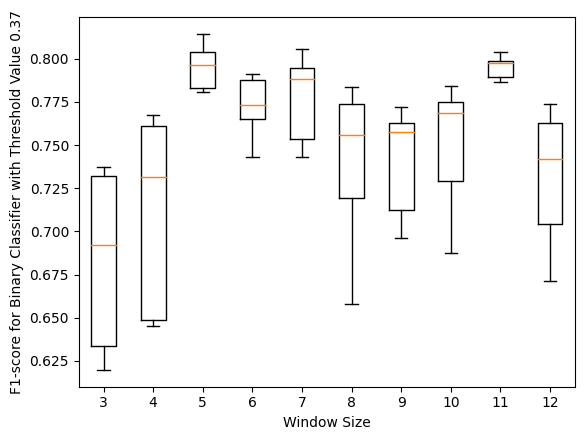

In [50]:
# to_plot = remove_outliers([nt_WS3, nt_WS4, nt_WS5, nt_WS6, nt_WS7, nt_WS8, nt_WS9, nt_WS10, nt_WS11, nt_WS12])
to_plot = [nt_WS3, nt_WS4, nt_WS5, nt_WS6, nt_WS7, nt_WS8, nt_WS9, nt_WS10, nt_WS11, nt_WS12]
plt.boxplot(to_plot, showfliers=False)
plt.xticks(np.arange(1,len(to_plot)+1), np.arange(3, len(to_plot)+3))
plt.xlabel("Window Size")
plt.ylabel("F1-score for Binary Classifier with Threshold Value 0.37")
plt.show()

## Variation of True Positive Rate with Changing Window Size

### Using Unmodified Threshold Values

In [53]:
# Results obtained from a separate file

# Possibly repeat experiment for window sizes 5 to 7 for more consistent results - need to make sure that our results are reproducible
WS3 = [0.7454545454545455, 0.8454545454545455, 0.8181818181818182, 0.7863636363636364, 0.8045454545454546, 0.7909090909090909, 0.9090909090909091, 0.8545454545454545, 0.7772727272727272, 0.8136363636363636]
WS4 = [0.8991596638655462, 0.7689075630252101, 0.7647058823529411, 0.9747899159663865, 0.8361344537815126, 0.7689075630252101, 0.7394957983193278, 0.7521008403361344, 0.9243697478991597, 0.8067226890756303]
WS5 = [0.946360153256705, 0.7049808429118773, 0.632183908045977, 0.6896551724137931, 0.8352490421455939, 0.8007662835249042, 0.6590038314176245, 0.6283524904214559, 0.7701149425287356, 0.7088122605363985]
WS6 = [0.7142857142857143, 0.7258687258687259, 0.7258687258687259, 0.6988416988416989, 0.7374517374517374, 0.640926640926641, 0.752895752895753, 0.8648648648648649, 0.7258687258687259, 0.749034749034749]
WS7 = [0.7338709677419355, 0.7379032258064516, 0.7419354838709677, 0.7096774193548387, 0.717741935483871, 0.6330645161290323, 0.7983870967741935, 0.967741935483871, 0.7580645161290323, 0.8145161290322581]
WS8 =  [0.9061224489795918, 0.6857142857142857, 0.8448979591836735, 0.7959183673469388, 0.6326530612244898, 0.6653061224489796, 0.889795918367347, 0.689795918367347, 0.673469387755102, 0.926530612244898]
WS9 =  [0.6818181818181818, 0.756198347107438, 0.7975206611570248, 0.7644628099173554, 0.7231404958677686, 0.6198347107438017, 0.6570247933884298, 0.8471074380165289, 0.7066115702479339, 0.7272727272727273]
WS10 = [0.69921875, 0.69140625, 0.83203125, 0.6875, 0.92578125, 0.703125, 0.80859375, 0.80078125, 0.73828125, 0.625]
WS11 = [0.7878787878787878, 0.7007575757575758, 0.6704545454545454, 0.6704545454545454, 0.7878787878787878, 0.6628787878787878, 0.7424242424242424, 0.6931818181818182, 0.8106060606060606, 0.7840909090909091]
WS12 =   [0.8, 0.7361702127659574, 0.8893617021276595, 0.7021276595744681, 0.6468085106382979, 0.6680851063829787, 0.7914893617021277, 0.8382978723404255, 0.7319148936170212, 0.8042553191489362]

The True Positive rate is defined as True Positive / (True Positive + False Negatives)


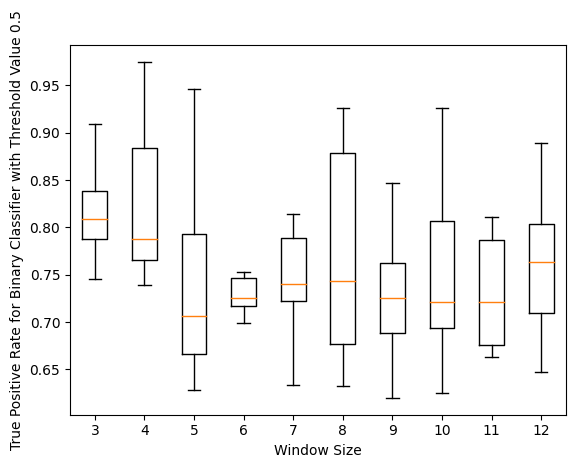

In [54]:
print("The True Positive rate is defined as True Positive / (True Positive + False Negatives)")

to_plot = [WS3, WS4, WS5, WS6, WS7, WS8, WS9, WS10, WS11, WS12]
plt.boxplot(to_plot, showfliers=False)
plt.xticks(np.arange(1,len(to_plot)+1), np.arange(3, len(to_plot)+3))
plt.xlabel("Window Size")
plt.ylabel("True Positive Rate for Binary Classifier with Threshold Value 0.5")
plt.show()

### Using Modified Threshold Value


In [55]:
nt_WS3 = [0.9409090909090909, 0.9772727272727273, 0.9818181818181818, 0.9636363636363636, 0.9363636363636364, 0.9318181818181818, 1.0, 1.0, 0.9318181818181818, 1.0]
nt_WS4 = [1.0, 0.9159663865546218, 0.8991596638655462, 1.0, 0.9747899159663865, 0.9117647058823529, 0.957983193277311, 1.0, 1.0, 0.9369747899159664]
nt_WS5 = [1.0, 0.9693486590038314, 0.9961685823754789, 0.9080459770114943, 0.9578544061302682, 0.9425287356321839, 0.9808429118773946, 0.8237547892720306, 0.9310344827586207, 0.9731800766283525]
nt_WS6 = [0.9111969111969112, 0.9768339768339769, 0.9034749034749034, 0.9073359073359073, 1.0, 0.8996138996138996, 0.9845559845559846, 0.9652509652509652, 0.9034749034749034, 0.9575289575289575]
nt_WS7 =  [0.967741935483871, 0.9153225806451613, 0.9475806451612904, 0.8911290322580645, 0.8830645161290323, 0.8870967741935484, 0.9919354838709677, 1.0, 0.9637096774193549, 1.0]
nt_WS8 = [0.963265306122449, 0.9020408163265307, 0.9306122448979591, 0.9387755102040817, 1.0, 0.9102040816326531, 0.9673469387755103, 0.9673469387755103, 0.9020408163265307, 0.9714285714285714]
nt_WS9 = [0.9090909090909091, 0.9462809917355371, 0.987603305785124, 0.9504132231404959, 0.9090909090909091, 0.8512396694214877, 0.9793388429752066, 0.9628099173553719, 0.9173553719008265, 0.987603305785124]
nt_WS10 = [0.9765625, 0.87890625, 1.0, 0.98046875, 0.99609375, 0.88671875, 0.97265625, 0.96484375, 0.91796875, 1.0]
nt_WS11 =  [0.9242424242424242, 0.8787878787878788, 0.8446969696969697, 0.8712121212121212, 0.9545454545454546, 0.8522727272727273, 0.9128787878787878, 0.9696969696969697, 1.0, 0.9393939393939394]
nt_WS12 = [1.0, 0.9234042553191489, 0.9829787234042553, 1.0, 0.9191489361702128, 0.9234042553191489, 0.9531914893617022, 0.9702127659574468, 0.9276595744680851, 0.9829787234042553]


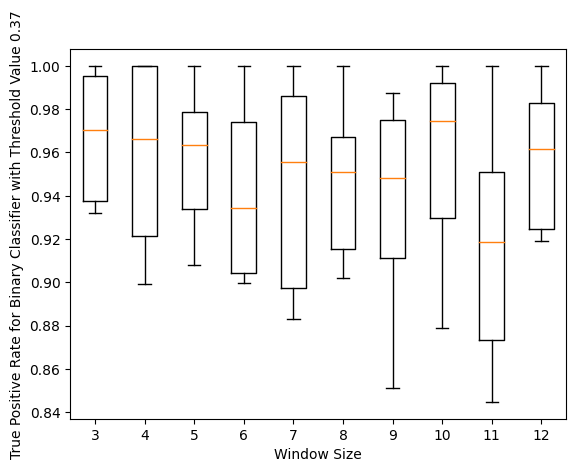

In [56]:
to_plot = [nt_WS3, nt_WS4, nt_WS5, nt_WS6, nt_WS7, nt_WS8, nt_WS9, nt_WS10, nt_WS11, nt_WS12]
plt.boxplot(to_plot, showfliers=False)
plt.xticks(np.arange(1,len(to_plot)+1), np.arange(3, len(to_plot)+3))
plt.xlabel("Window Size")
plt.ylabel("True Positive Rate for Binary Classifier with Threshold Value 0.37")
plt.show()

## Variation of different percentiles with Window Sizes

In [13]:
# %matplotlib inline
text_files = os.listdir()
text_files = sorted([f for f in text_files if '.txt' in f])

print(text_files)
measurements_dict = {}
for file in text_files:
    measurements = []
    with open(file, 'r') as filehandle:
        for line in filehandle:
            current_entry = line[:-1]
            meas = float(current_entry)
            measurements.append(meas)
    # measurements_list.append(measurements)  
    measurements_dict[file] = measurements

print(measurements_dict.keys())

['WS10CDF.txt', 'WS11CDF.txt', 'WS12CDF.txt', 'WS3CDF.txt', 'WS4CDF.txt', 'WS5CDF.txt', 'WS6CDF.txt', 'WS7CDF.txt', 'WS8CDF.txt', 'WS9CDF.txt']
dict_keys(['WS10CDF.txt', 'WS11CDF.txt', 'WS12CDF.txt', 'WS3CDF.txt', 'WS4CDF.txt', 'WS5CDF.txt', 'WS6CDF.txt', 'WS7CDF.txt', 'WS8CDF.txt', 'WS9CDF.txt'])


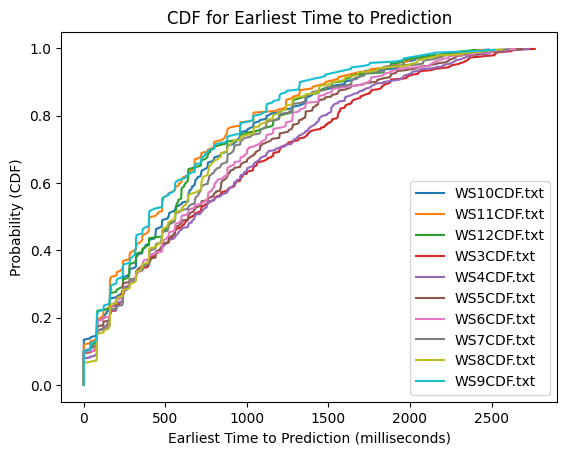

In [14]:
plt.xlabel("Earliest Time to Prediction (milliseconds)")
plt.ylabel("Probability (CDF)")
plt.title("CDF for Earliest Time to Prediction")

lines = []
for filename in list(measurements_dict.keys()):
    
    earliest_times_unfiltered = measurements_dict[filename]
    earliest_times = [t * 1000 for t in earliest_times_unfiltered]
    N = len(earliest_times)

    x = np.sort(earliest_times)
    y = np.arange(N) / float(N)

    line, = plt.plot(x,y, marker='')
    lines.append(line)

    earliest_times_df = pd.DataFrame(earliest_times)
    # print(earliest_times_df.describe())
plt.legend(lines, text_files)
plt.show()


In [15]:
l100 = []
l200 = []
l500 = []
l1000 = []
labels = []

for key in measurements_dict.keys():

    label = re.findall(r'\d+', key)
    labels.append(label[0])

    meas = measurements_dict[key]

    N = len(meas)

    g100 = 0
    g200 = 0
    g500 = 0
    g1000 = 0

    for x in meas:
        if x >= 0.1:
            g100 += 1
        if x >= 0.2:
            g200 += 1
        if x >= 0.5:
            g500 += 1
        if x >= 1:
            g1000 += 1

    l100.append(g100/N)
    l200.append(g200/N)
    l500.append(g500/N)
    l1000.append(g1000/N)

percentiles = [l100, l200, l500, l1000]

In [16]:
def sort_list_by_integer_value(lst):
    return sorted(lst, key=lambda x: int(x))

# to_sort is the list that needs to be sorted, to_arrange is a list of lists which need reararnging in the same order
def sort_lists(to_sort, to_arrange):
    order_dict = {}

    # Maintain dictionary for correct pairing, with value containing the relevant index in l100, l200 etc.
    for i, val in enumerate(to_sort):
        order_dict[val] = i

    sorted_list = sort_list_by_integer_value(to_sort)

    # Sort the original lists according to this new order
    arranged_list = []
    for i in range(len(to_arrange)):
        arranged_list.append([])
    
    for new_key in sorted_list:
        position = order_dict[new_key]
        for i, _ in enumerate(to_arrange):
            arranged_list[i].append(to_arrange[i][position]) # index using i (which tells which list to go to), and position which tells where to index into the original list
    
    return sorted_list, arranged_list

sorted_labels, arranged_list = sort_lists(labels, [l100, l200, l500, l1000])

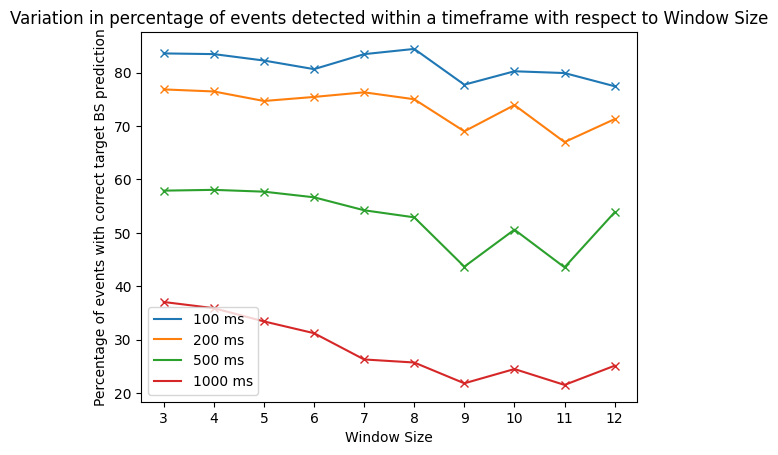

In [17]:
plt.xlabel("Window Size")
plt.ylabel("Percentage of events with correct target BS prediction")
plt.title("Variation in percentage of events detected within a timeframe with respect to Window Size")

for percentile in arranged_list:
    y = [x * 100 for x in percentile]
    x = sorted_labels

    line, = plt.plot(x, y, marker='x')

plt.legend(lines, ["100 ms", "200 ms", "500 ms", "1000 ms"])
plt.show()

In [19]:
def compare_files(file1, file2):
    with open(file1) as f1, open(file2) as f2:
        lines1 = f1.readlines()
        lines2 = f2.readlines()
    return [line for line in lines1 if line not in lines2], [line for line in lines2 if line not in lines1]

file1 = "WS6CDF.txt"
file2 = "WS6CDF.txt"
different_in_file1, different_in_file2 = compare_files(file1, file2)

print("Lines different in file 1:")
for line in different_in_file1:
    print(line)

print("\nLines different in file 2:")
for line in different_in_file2:
    print(line)

Lines different in file 1:

Lines different in file 2:
